# Top 5 Quotes dummy model

In [22]:
import pandas as pd
import itertools
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = "../raw_data/quotes - reduced.csv"
quotes = pd.read_csv(file, decimal=",")
quotes.head(3)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."


In [3]:
tags_list = quotes.category.to_list()
number_of_tags = []
for i in tags_list:
    number_of_tags.append(len(str(i).split(',')))

In [4]:
quotes['quotes_length'] = quotes['quote'].copy()
for index, row in quotes.iterrows():
    quotes.loc[index, "quotes_length"] = len(str(row['quotes_length']).split(' '))

## Cleaning data: tags are all lowercase, '-' were replaced with ',', duplicates were removed

In [5]:
for index, row in quotes.iterrows():
    quotes.loc[index, "category"] = str(row['category']).lower().replace('-',', ')

In [6]:
quotes['list_tags'] = quotes['category'].copy()
for index,row in quotes.iterrows():
    quotes.loc[index, 'count_tags'] = len(str(row['list_tags']).split(','))
quotes.count_tags.describe()

count    156656.000000
mean          9.747638
std          15.356019
min           1.000000
25%           3.000000
50%           5.000000
75%          11.000000
max         568.000000
Name: count_tags, dtype: float64

In [7]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(row['list_tags']).split(',')

In [8]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(set(row['list_tags']))

In [9]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
quotes['list_tags'] = quotes['list_tags'].apply(remove_punctuations)

In [10]:
vectorizer = TfidfVectorizer()
tags_vectorized = vectorizer.fit_transform(quotes['list_tags'])
dummy_tags = LatentDirichletAllocation(n_components=5)
lda_vectors = dummy_tags.fit_transform(tags_vectorized)

In [11]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(dummy_tags, vectorizer.fit(quotes['list_tags']))

Topic 0:
[('inspirational', 3650.8768572601734), ('life', 3339.1726005134287), ('quotes', 2612.6615727594594), ('motivational', 1762.4080945515987), ('writing', 1754.987350715119), ('inspiration', 1556.6452223069969), ('self', 1537.5935024215287), ('lessons', 1349.8828446131438), ('success', 1310.7935045102076), ('motivation', 1239.4041451269798)]
Topic 1:
[('love', 2005.3423284287821), ('romance', 1810.4174084683577), ('fiction', 1264.8868430969608), ('feminism', 1213.8353621061226), ('women', 1207.876230434013), ('marriage', 1167.05683311547), ('fantasy', 1103.3611956797297), ('sex', 1068.213044687214), ('death', 1052.4424813657795), ('relationships', 739.195820749136)]
Topic 2:
[('poetry', 1745.2692095917193), ('god', 1542.6186567993977), ('religion', 1517.6516007619043), ('reading', 1249.8522250844267), ('faith', 1143.7010076074316), ('christianity', 1107.7149646915327), ('science', 1058.2339504758245), ('love', 1021.4296053320269), ('nature', 1003.4096916890909), ('family', 872.89

In [12]:
lda_vectors[1]

array([0.05965695, 0.05911973, 0.29855933, 0.52266864, 0.05999535])

In [13]:
quotes.iloc[-1] = ['me, Paris, selfie, singing, book','image','image','5','image','1']

In [14]:
picture_vectorized = vectorizer.transform(quotes.iloc[-1])
lda_vectors_self = dummy_tags.transform(picture_vectorized)
for index,row in quotes.iterrows():
    quotes['topic'] = quotes.quote.copy()

In [15]:
for index,row in quotes.iterrows():
    quotes.at[index, 'topic'] = int(np.where(lda_vectors[index] == max(lda_vectors[index]))[0])

In [16]:
quotes.tail()

,quote,author,category,quotes_length,list_tags,count_tags,topic
156651,The harassed look is that of a desperately tir...,"Christopher Isherwood, A Single Man","dying, living",96,living dying,2.0,2
156652,…In this way that he sought to control the ver...,"Jesse Ball, The Curfew","life, living, mindfulness",39,life mindfulness living,3.0,0
156653,"No matter how we choose to live, we both die a...","Adam Silvera, They Both Die at the End","death, living",13,living death,2.0,0
156654,The goal that you hope you will one day arrive...,"Marcus Aurelius, The Essential Marcus Aurelius",living,239,living,1.0,0
156655,"me, Paris, selfie, singing, book",image,image,5,image,1,0


(array([46599.,     0., 24500.,     0.,     0., 36228.,     0., 23664.,
            0., 25541.]),
 array([0.0, 0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4000000000000004,
        2.8000000000000003, 3.2, 3.6, 4.0], dtype=object),
 <BarContainer object of 10 artists>)

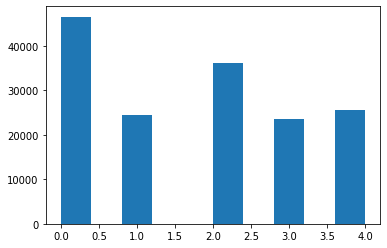

In [23]:
plt.hist(quotes.topic)

__Adding the image caption as the last line to our dataset to be able to see the closest neighbourhs__

In [20]:
image_topic = int(quotes.iloc[-1, [-1]])
image_topic

0

In [18]:
quotes = quotes.dropna()
only_topic = quotes[quotes.topic == image_topic]
only_topic.head()

,quote,author,category,quotes_length,list_tags,count_tags,topic
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive, out, hate, inspirational, lig...",20,out inspirational drive love darkness pea...,8.0,0
5,We accept the love we think we deserve.,"Stephen Chbosky, The Perks of Being a Wallflower","inspirational, love",8,inspirational love,2.0,0
7,It is better to be hated for what you are than...,"André Gide, Autumn Leaves","life, love",19,life love,2.0,0
10,"It is not a lack of love, but a lack of friend...",Friedrich Nietzsche,"friendship, lack, of, friendship, lack, of, lo...",16,love friendship lack of marriage friendsh...,11.0,0
12,"Love all, trust a few, do wrong to none.","William Shakespeare, All's Well That Ends Well","do, wrong, love, trust, wrong",9,do wrong love trust,5.0,0


In [36]:
tfidf_weight = vectorizer.fit_transform(only_topic['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'euclidean')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_top5 = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head()

result_top5

,quote,author
4,You are what your creators and experiences hav...,"N.K. Jemisin, The Hundred Thousand Kingdoms"
10,Every life needs a little space. It leaves roo...,"Sarah Addison Allen, The Peach Keeper"
13,Every day send some blessings to the world. Le...,"Amit Ray, Walking the Path of Compassion"
19,"If something doesn't work exactly right, or ma...","Sarah Dessen, Keeping the Moon"
20,Everyone wants a prodigy to fail it makes our ...,Harold Bloom
